## Digital Image Processing Exercise 1_3

Amirkabir University of Technology

Dr. Rahmati 

By Gholamrezadar 400131018

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('dark')


## Loading Images

In [60]:
img_a_1 = cv2.imread('inputs/P3/mylius_erichsen_land_2000.jpg')
img_a_2 = cv2.imread('inputs/P3/mylius_erichsen_land_2020.jpg')

img_b_1 = cv2.imread('inputs/P3/lake_urmia_2000.jpg')
img_b_2 = cv2.imread('inputs/P3/lake_urmia_2018.jpg')
img_b_3 = cv2.imread('inputs/P3/lake_urmia_2020.jpg')

img_c_1 = cv2.imread('inputs/P3/furtwangler_glacier_2003.jpg')
img_c_2 = cv2.imread('inputs/P3/furtwangler_glacier_2017.jpg')

img_d_1 = cv2.imread('inputs/P3/siling_lake_1985.jpg')
img_d_2 = cv2.imread('inputs/P3/siling_lake_1990.jpg')
img_d_3 = cv2.imread('inputs/P3/siling_lake_1995.jpg')
img_d_4 = cv2.imread('inputs/P3/siling_lake_2000.jpg')
img_d_5 = cv2.imread('inputs/P3/siling_lake_2005.jpg')
img_d_6 = cv2.imread('inputs/P3/siling_lake_2010.jpg')
img_d_7 = cv2.imread('inputs/P3/siling_lake_2015.jpg')
img_d_8 = cv2.imread('inputs/P3/siling_lake_2020.jpg')


## Units
+ Greenland:
10 km = 217 pixels

+ Urmia:
20 km = 314 pixels

+ Tanzania:
200 m = 294 pixels

+ China:
10 km = 252 pixels



## A

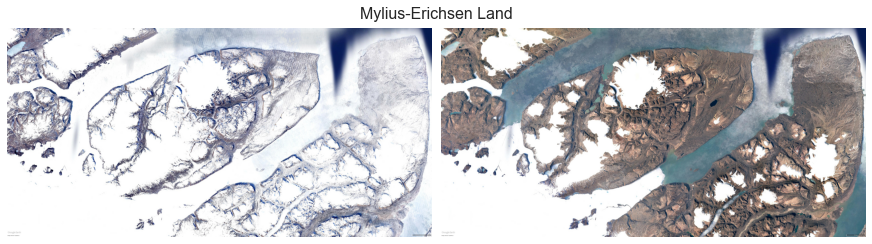

In [61]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
fig.suptitle('Mylius-Erichsen Land', y=0.85, fontsize=16)
axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(img_a_1, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(img_a_2, cv2.COLOR_BGR2RGB))

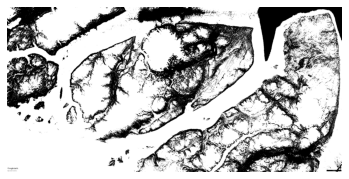

In [62]:
hsv = cv2.cvtColor(img_a_1, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
lower_color = np.array([0, 0, 220])
upper_color = np.array([180, 255, 255])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_color, upper_color)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result_1 = cv2.bitwise_and(img_a_1, img_a_1, mask=mask)
_, result_1 = cv2.threshold(result_1, 25, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(cv2.cvtColor(result_1, cv2.COLOR_BGR2RGB))
plt.show()

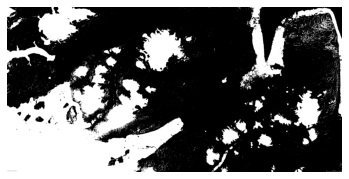

In [63]:
hsv = cv2.cvtColor(img_a_2, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
lower_color = np.array([0, 0, 170])
upper_color = np.array([180, 30, 255])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_color, upper_color)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result_2 = cv2.bitwise_and(img_a_2, img_a_2, mask=mask)

_, result_2 = cv2.threshold(result_2, 25, 255, cv2.THRESH_BINARY)


plt.axis('off')
plt.imshow(cv2.cvtColor(result_2, cv2.COLOR_BGR2RGB))
plt.show()

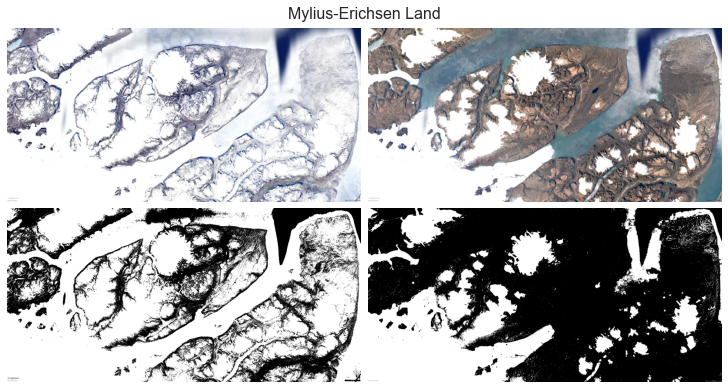

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle('Mylius-Erichsen Land', y=1.05, fontsize=16)
axs[0][0].axis('off')
axs[0][0].imshow(cv2.cvtColor(img_a_1, cv2.COLOR_BGR2RGB))
axs[0][1].axis('off')
axs[0][1].imshow(cv2.cvtColor(img_a_2, cv2.COLOR_BGR2RGB))
axs[1][0].axis('off')
axs[1][0].imshow(cv2.cvtColor(result_1, cv2.COLOR_BGR2RGB))
axs[1][1].axis('off')
axs[1][1].imshow(cv2.cvtColor(result_2, cv2.COLOR_BGR2RGB))

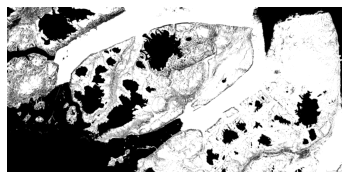

In [65]:
# calculate the difference between img_a_1 and img_a_2
diff_a = cv2.absdiff(img_a_1, img_a_2)
# threshold diff_a
_, diff_a = cv2.threshold(diff_a, 25, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(cv2.cvtColor(diff_a, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

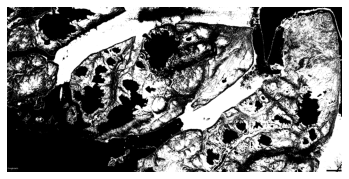

In [66]:
# calculate the difference between result_1 and result_2
diff_results_a = cv2.absdiff(result_1, result_2)
# threshold diff_a
# _, diff_results_a = cv2.threshold(diff_a, 25, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(cv2.cvtColor(diff_results_a, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

In [67]:
# Count White pixels
white_pixels_a_2010 = cv2.countNonZero(result_1[:, :, 0])/result_1[:, :, 0].size
white_pixels_a_2020 = cv2.countNonZero(result_2[:, :, 0])/result_2[:, :, 0].size
white_pixels_a_diff = cv2.countNonZero(diff_results_a[:, :, 0])/diff_results_a[:, :, 0].size

Percentage of ice melted: 56.99 %


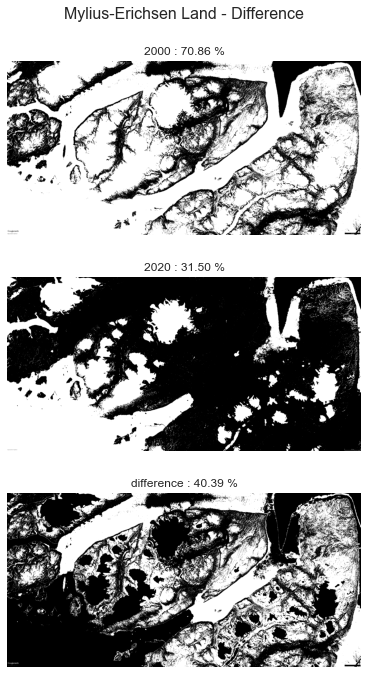

In [68]:

fig, axs = plt.subplots(3, 1, figsize=(5, 9), constrained_layout=True)
fig.suptitle('Mylius-Erichsen Land - Difference', y=1.05, fontsize=16)
axs[0].axis('off')
axs[0].set_title(f'2000 : {white_pixels_a_2010*100:.2f} %')
axs[0].imshow(cv2.cvtColor(result_1, cv2.COLOR_BGR2GRAY), cmap='gray')

axs[1].axis('off')
axs[1].set_title(f'2020 : {white_pixels_a_2020*100:.2f} %')
axs[1].imshow(cv2.cvtColor(result_2, cv2.COLOR_BGR2GRAY), cmap='gray')

axs[2].axis('off')
axs[2].set_title(f'difference : {white_pixels_a_diff*100:.2f} %')
axs[2].imshow(cv2.cvtColor(diff_results_a, cv2.COLOR_BGR2GRAY), cmap='gray')
print(f"Percentage of ice melted: {white_pixels_a_diff/white_pixels_a_2010*100:.2f} %")

## B

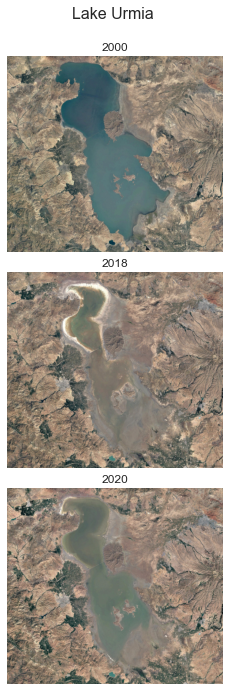

In [69]:
fig, axs = plt.subplots(3, 1, figsize=(5, 9), constrained_layout=True)
fig.suptitle('Lake Urmia ', y=1.05, fontsize=16)
axs[0].axis('off')
axs[0].set_title(f'2000')
axs[0].imshow(cv2.cvtColor(img_b_1, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title(f'2018')
axs[1].imshow(cv2.cvtColor(img_b_2, cv2.COLOR_BGR2RGB))

axs[2].axis('off')
axs[2].set_title(f'2020')
axs[2].imshow(cv2.cvtColor(img_b_3, cv2.COLOR_BGR2RGB))

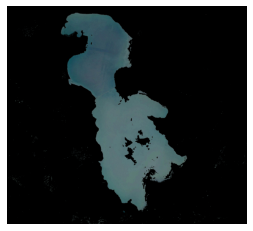

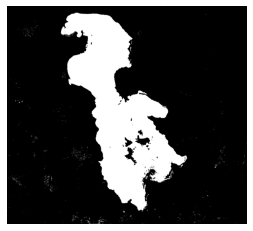

In [70]:
hsv = cv2.cvtColor(img_b_1, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
lower_color = np.array([60, 48, 80])
upper_color = np.array([175, 255, 255])

water_mask = cv2.inRange(hsv, lower_color, upper_color)

urmia_2000_lake = cv2.bitwise_and(img_b_1, img_b_1, mask=water_mask)

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2000_lake, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(water_mask, cv2.COLOR_BGR2RGB))
plt.show()

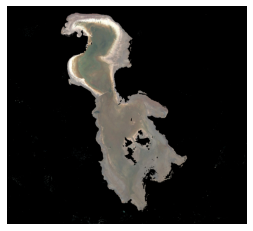

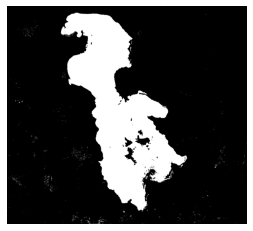

In [71]:
urmia_2018_lake = cv2.bitwise_and(img_b_2, img_b_2, mask=water_mask)

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2018_lake, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(water_mask, cv2.COLOR_BGR2RGB))
plt.show()

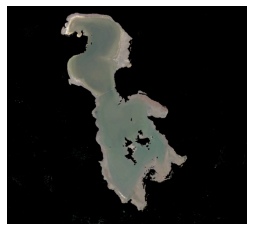

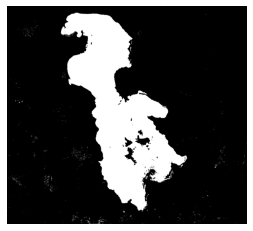

In [72]:
urmia_2020_lake = cv2.bitwise_and(img_b_3, img_b_3, mask=water_mask)

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2020_lake, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(water_mask, cv2.COLOR_BGR2RGB))
plt.show()

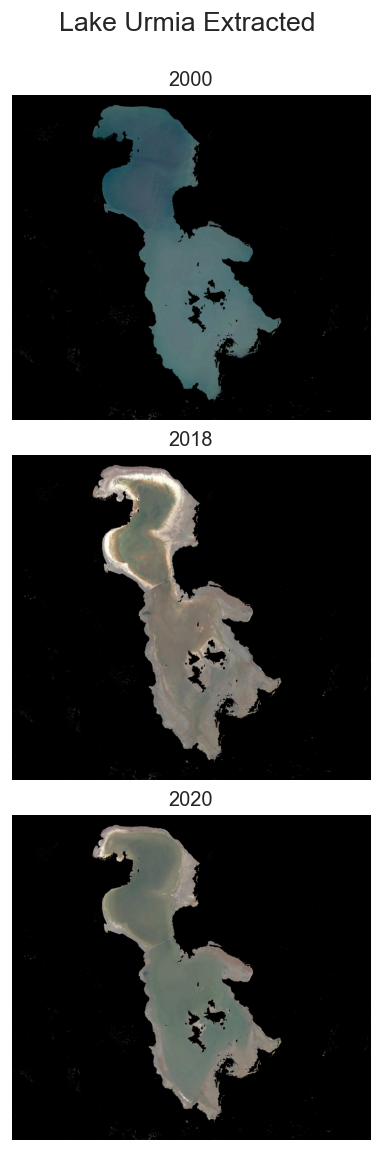

In [73]:
fig, axs = plt.subplots(3, 1, figsize=(5, 9),  constrained_layout=True)
fig.dpi=120
fig.suptitle('Lake Urmia Extracted ', y=1.05, fontsize=16)
axs[0].axis('off')
axs[0].set_title(f'2000')
axs[0].imshow(cv2.cvtColor(urmia_2000_lake, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title(f'2018')
axs[1].imshow(cv2.cvtColor(urmia_2018_lake, cv2.COLOR_BGR2RGB))

axs[2].axis('off')
axs[2].set_title(f'2020')
axs[2].imshow(cv2.cvtColor(urmia_2020_lake, cv2.COLOR_BGR2RGB))

### Extract water from images

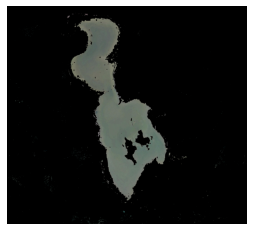

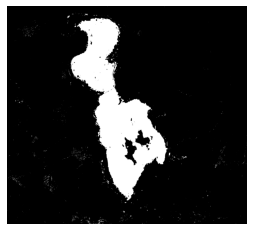

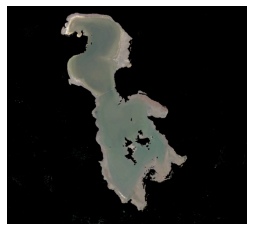

In [74]:
# Urmia 2020 water extraction
hsv = cv2.cvtColor(urmia_2020_lake, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space

lower_color = np.array([30, 0, 0])
upper_color = np.array([180, 255, 135])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_color, upper_color)

urmia_2020_lake_water = cv2.bitwise_and(urmia_2020_lake, urmia_2020_lake, mask=mask)

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2020_lake_water, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2020_lake, cv2.COLOR_BGR2RGB))
plt.show()



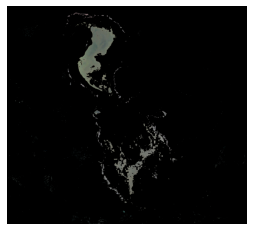

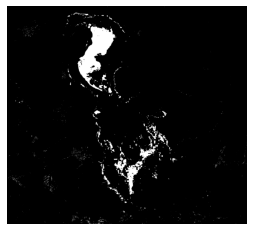

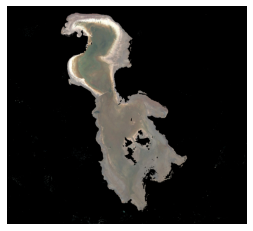

In [75]:
# Urmia 2018 water extraction
hsv = cv2.cvtColor(urmia_2018_lake, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
lower_color = np.array([30, 0, 0])
upper_color = np.array([180, 255, 155])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_color, upper_color)

urmia_2018_lake_water = cv2.bitwise_and(urmia_2018_lake, urmia_2018_lake, mask=mask)

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2018_lake_water, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(urmia_2018_lake, cv2.COLOR_BGR2RGB))
plt.show()



### testing difference

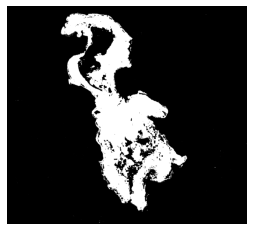

In [76]:
# calculate the difference between img_b_1 and img_b_2
diff_b = cv2.absdiff(urmia_2000_lake, urmia_2018_lake_water)
# threshold diff_a
_, diff_b = cv2.threshold(diff_b, 80, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(diff_b[:,:,0], cmap='gray')
plt.show()

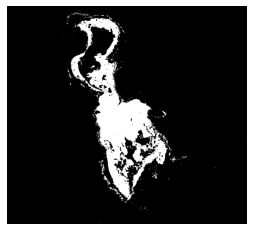

In [77]:
# calculate the difference between img_b_1 and img_b_2
diff_b_2 = cv2.absdiff(urmia_2018_lake_water, urmia_2020_lake_water)
# threshold diff_a
_, diff_b_2 = cv2.threshold(diff_b_2, 80, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(diff_b_2[:,:,0], cmap='gray')
plt.show()

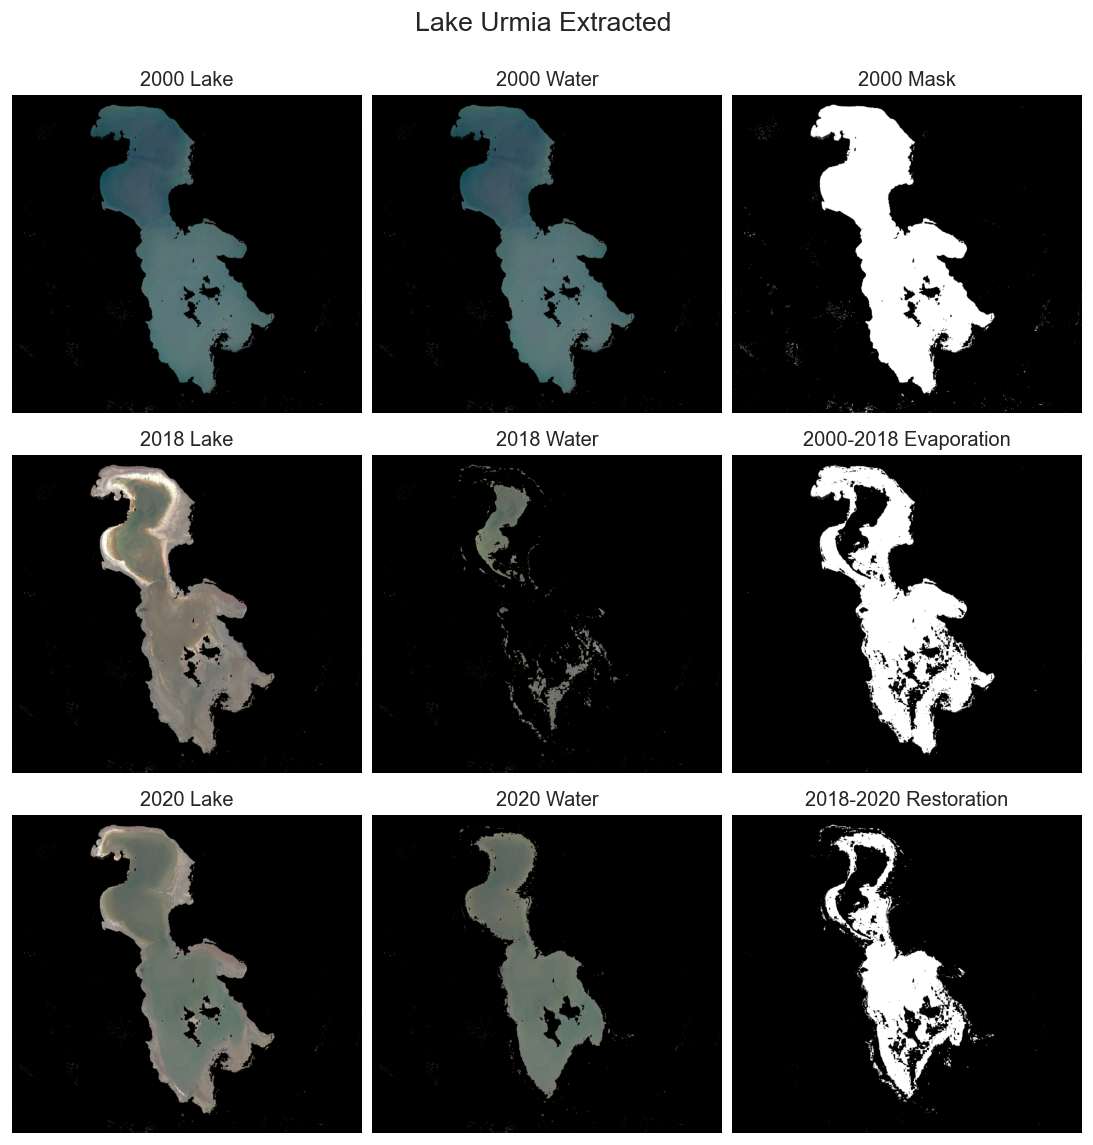

In [78]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9),  constrained_layout=True)
fig.dpi=120
fig.suptitle('Lake Urmia Extracted ', y=1.05, fontsize=16)
axs[0][0].axis('off')
axs[0][0].set_title(f'2000 Lake')
axs[0][0].imshow(cv2.cvtColor(urmia_2000_lake, cv2.COLOR_BGR2RGB))

axs[1][0].axis('off')
axs[1][0].set_title(f'2018 Lake')
axs[1][0].imshow(cv2.cvtColor(urmia_2018_lake, cv2.COLOR_BGR2RGB))

axs[2][0].axis('off')
axs[2][0].set_title(f'2020 Lake')
axs[2][0].imshow(cv2.cvtColor(urmia_2020_lake, cv2.COLOR_BGR2RGB))


axs[0][1].axis('off')
axs[0][1].set_title(f'2000 Water')
axs[0][1].imshow(cv2.cvtColor(urmia_2000_lake, cv2.COLOR_BGR2RGB))

axs[1][1].axis('off')
axs[1][1].set_title(f'2018 Water')
axs[1][1].imshow(cv2.cvtColor(urmia_2018_lake_water, cv2.COLOR_BGR2RGB))

axs[2][1].axis('off')
axs[2][1].set_title(f'2020 Water')
axs[2][1].imshow(cv2.cvtColor(urmia_2020_lake_water, cv2.COLOR_BGR2RGB))


axs[0][2].axis('off')
axs[0][2].set_title(f'2000 Mask')
axs[0][2].imshow(cv2.cvtColor(water_mask, cv2.COLOR_BGR2RGB))

axs[1][2].axis('off')
axs[1][2].set_title(f'2000-2018 Evaporation')
axs[1][2].imshow(diff_b[:,:,0], cmap='gray')

axs[2][2].axis('off')
axs[2][2].set_title(f'2018-2020 Restoration')
axs[2][2].imshow(diff_b_2[:,:,0], cmap='gray')

In [79]:
one_px = (20/314)**2 # km^2
urmia_2000_volume = cv2.countNonZero(urmia_2000_lake[:,:,0])*one_px*0.0028
urmia_2018_volume = cv2.countNonZero(urmia_2018_lake_water[:,:,0])*one_px*0.0006
urmia_2020_volume = cv2.countNonZero(urmia_2020_lake_water[:,:,0])*one_px*0.0009

print(f'Urmia 2000 Lake Volume: {urmia_2000_volume:.3f} km^3')
print(f'Urmia 2018 Lake Volume: {urmia_2018_volume:.3f} km^3')
print(f'Urmia 2020 Lake Volume: {urmia_2020_volume:.3f} km^3')

# B
print("B)", end=" ")
# Volume of water evaporated between 2000 & 2018
print(f'Volume of water evaporated between 2000 & 2018: {urmia_2018_volume - urmia_2000_volume:.3f} km^3')

# C
print("C)", end=" ")
# Percentage of water restored between 2018 & 2020
print(f'Percentage of water restored between 2018 & 2020: {(urmia_2020_volume - urmia_2018_volume)/urmia_2000_volume*100:.3f} %')


Urmia 2000 Lake Volume: 13.565 km^3
Urmia 2018 Lake Volume: 0.525 km^3
Urmia 2020 Lake Volume: 2.866 km^3
B) Volume of water evaporated between 2000 & 2018: -13.040 km^3
C) Percentage of water restored between 2018 & 2020: 17.257 %


## D

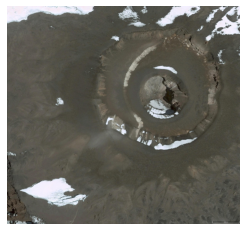

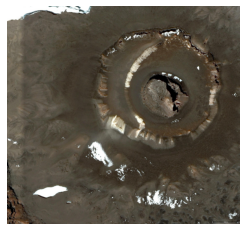

In [80]:

plt.axis('off')
plt.imshow(cv2.cvtColor(img_c_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.imshow(cv2.cvtColor(img_c_2, cv2.COLOR_BGR2RGB))
plt.show()

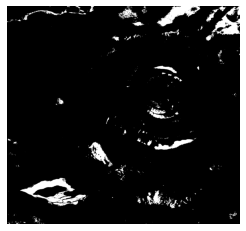

In [81]:
# calculate the difference between img_b_1 and img_b_2
# diff_d = cv2.absdiff(cv2.cvtColor(img_c_1, cv2.COLOR_BGR2YCR_CB), cv2.cvtColor(img_c_2, cv2.COLOR_BGR2YCR_CB))
diff_d = cv2.absdiff(img_c_1, img_c_2)
# threshold diff_a
_, diff_d = cv2.threshold(diff_d, 140, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(diff_d[:,:,0], cmap='gray')
plt.show()

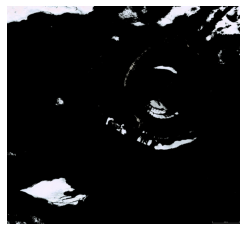

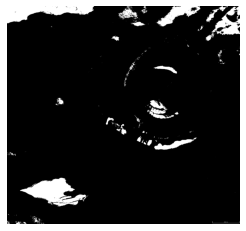

In [82]:
# Glacier 2003 ice extraction
hsv = cv2.cvtColor(img_c_1, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space

lower_color = np.array([0, 0, 180])
upper_color = np.array([180, 40, 255])

# preparing the mask to overlay
mask_glacier_2003 = cv2.inRange(hsv, lower_color, upper_color)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
glacier_2003_ice = cv2.bitwise_and(hsv, hsv, mask=mask_glacier_2003)

plt.axis('off')
plt.imshow(cv2.cvtColor(glacier_2003_ice, cv2.COLOR_HSV2RGB))
plt.show()

plt.axis('off')
plt.imshow(mask_glacier_2003, cmap='gray')
plt.show()


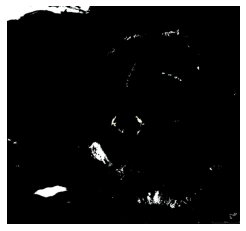

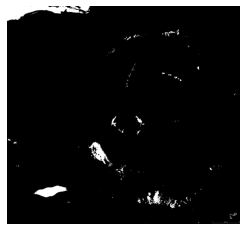

In [83]:
# Glacier 2003 ice extraction
hsv = cv2.cvtColor(img_c_2, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space

lower_color = np.array([0, 0, 240])
upper_color = np.array([180, 40, 255])

# preparing the mask to overlay
mask_glacier_2015 = cv2.inRange(hsv, lower_color, upper_color)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
glacier_2015_ice = cv2.bitwise_and(hsv, hsv, mask=mask_glacier_2015)

plt.axis('off')
plt.imshow(cv2.cvtColor(glacier_2015_ice, cv2.COLOR_HSV2RGB))
plt.show()

plt.axis('off')
plt.imshow(mask_glacier_2015, cmap='gray')
plt.show()


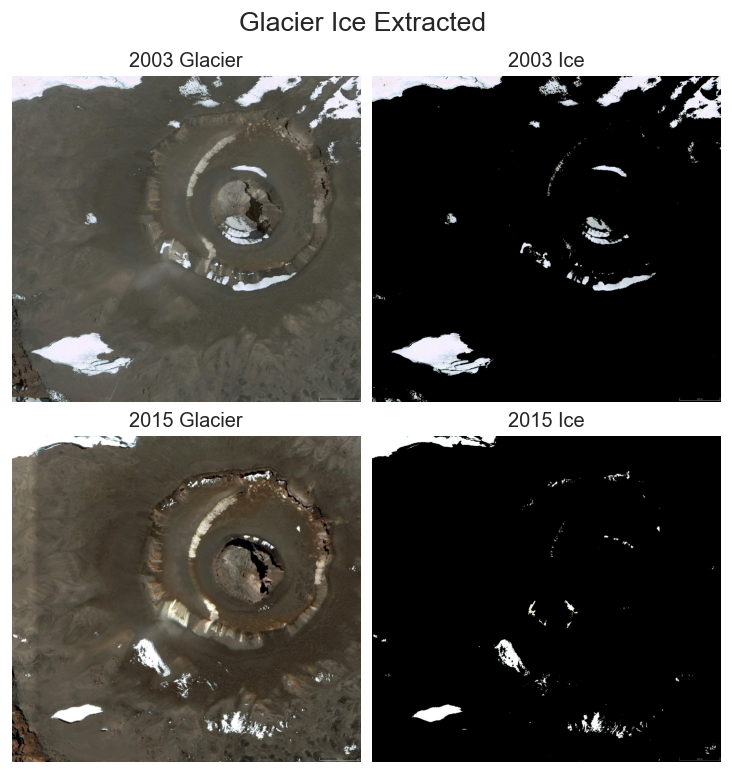

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6),  constrained_layout=True)
fig.dpi=120
fig.suptitle('Glacier Ice Extracted ', y=1.05, fontsize=16)
axs[0][0].axis('off')
axs[0][0].set_title(f'2003 Glacier')
axs[0][0].imshow(cv2.cvtColor(img_c_1, cv2.COLOR_BGR2RGB))

axs[1][0].axis('off')
axs[1][0].set_title(f'2015 Glacier')
axs[1][0].imshow(cv2.cvtColor(img_c_2, cv2.COLOR_BGR2RGB))


axs[0][1].axis('off')
axs[0][1].set_title(f'2003 Ice')
axs[0][1].imshow(cv2.cvtColor(glacier_2003_ice, cv2.COLOR_HSV2RGB))

axs[1][1].axis('off')
axs[1][1].set_title(f'2015 Ice')
axs[1][1].imshow(cv2.cvtColor(glacier_2015_ice, cv2.COLOR_HSV2RGB))



In [85]:
one_px = (200/294)**2 # m^2
glacier_2003_volume = cv2.countNonZero(mask_glacier_2003)*one_px*6.2
glacier_2015_volume = cv2.countNonZero(mask_glacier_2015)*one_px*4.8

print(f'Glacier 2003 Ice Volume: {glacier_2003_volume:.3f} m^3')
print(f'Glacier 2015 Ice Volume: {glacier_2015_volume:.3f} m^3')

# D
print("D)", end=" ")
# Volume of water evaporated between 2000 & 2018
print(f'Volume of Ice melted between 2003 & 2015: {glacier_2003_volume - glacier_2015_volume:.3f} m^3')

Glacier 2003 Ice Volume: 1125715.026 m^3
Glacier 2015 Ice Volume: 316716.924 m^3
D) Volume of Ice melted between 2003 & 2015: 808998.103 m^3


## E

In [88]:
siling_waters = []
siling_masks = []

for img in [img_d_1, img_d_2, img_d_3, img_d_4, img_d_5, img_d_6, img_d_7, img_d_8]:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Threshold of blue in HSV space

    lower_color = np.array([80, 0, 0])
    upper_color = np.array([125, 255, 255])

    # preparing the mask to overlay
    mask = cv2.inRange(hsv, lower_color, upper_color)

    lake = cv2.bitwise_and(img, img, mask=mask)

    siling_waters.append(lake)
    siling_masks.append(mask)

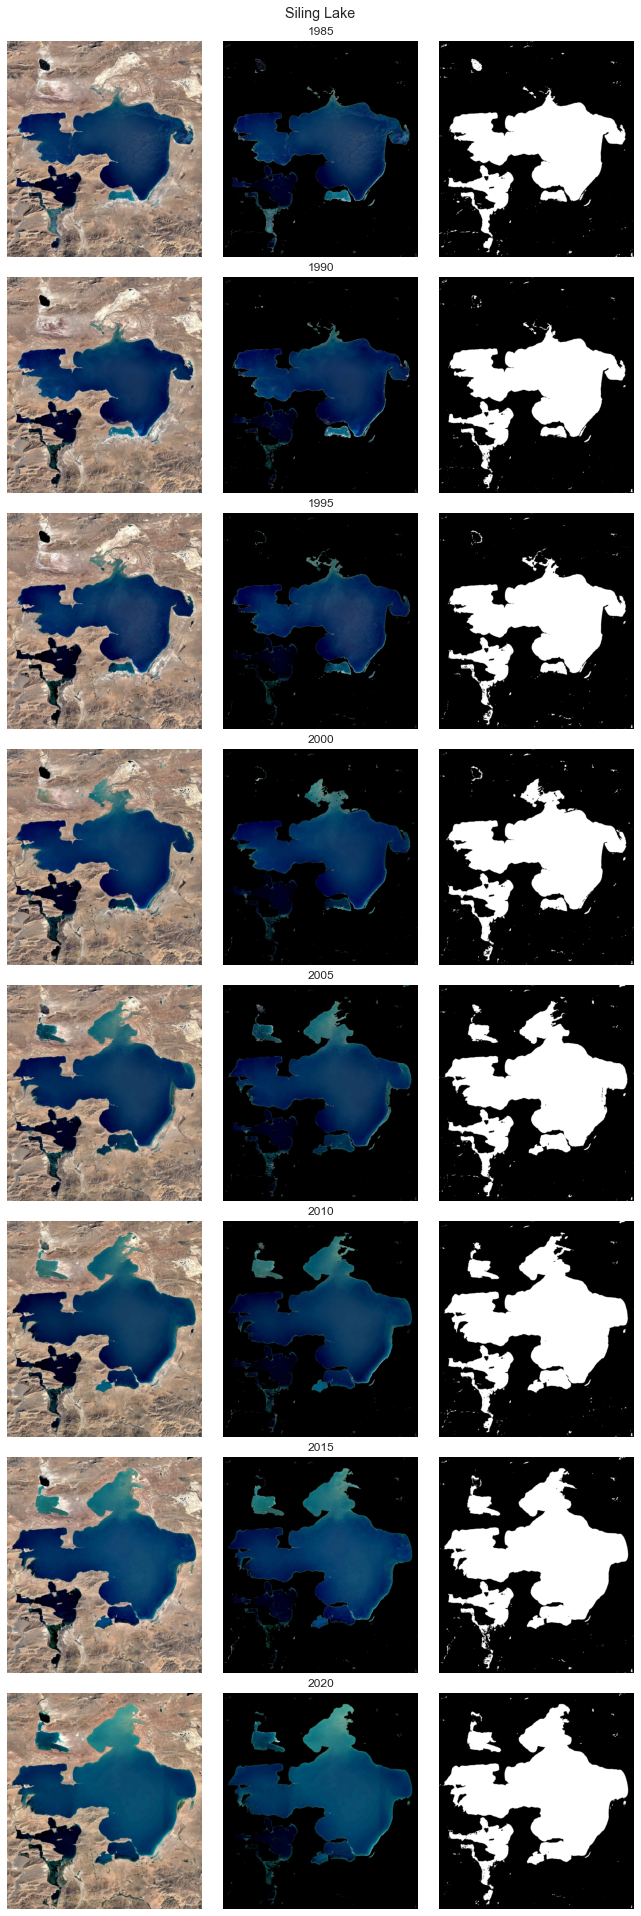

In [89]:
years = [1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

fig, axs = plt.subplots(8,3, figsize=(9, 26.5), constrained_layout=True)
fig.suptitle('Siling Lake')
for ax, org, water, mask, year in zip(axs, [img_d_1, img_d_2, img_d_3, img_d_4, img_d_5, img_d_6, img_d_7, img_d_8], siling_waters, siling_masks, years):
    ax[0].axis('off')
    ax[0].imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    ax[1].axis('off')
    ax[1].set_title(f'{year}')
    ax[1].imshow(cv2.cvtColor(water, cv2.COLOR_BGR2RGB))
    ax[2].axis('off')
    ax[2].imshow(mask, cmap='gray')


In [90]:
depths = [6.4, 6.7, 7.0, 7.3, 7.6, 7.9, 8.2, 8.5]
years = [1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
one_px = (10/252)**2 # km^2
volumes = []
for img, depth, year in zip(siling_masks, depths, years):
    volume = cv2.countNonZero(img)*one_px*depth/1000.0
    volumes.append(volume)

    print(f'Siling Lake {year} Volume: {volume:.3f} km^3')

Siling Lake 1985 Volume: 13.199 km^3
Siling Lake 1990 Volume: 13.629 km^3
Siling Lake 1995 Volume: 14.533 km^3
Siling Lake 2000 Volume: 16.121 km^3
Siling Lake 2005 Volume: 19.348 km^3
Siling Lake 2010 Volume: 21.135 km^3
Siling Lake 2015 Volume: 22.514 km^3
Siling Lake 2020 Volume: 23.590 km^3


<BarContainer object of 8 artists>

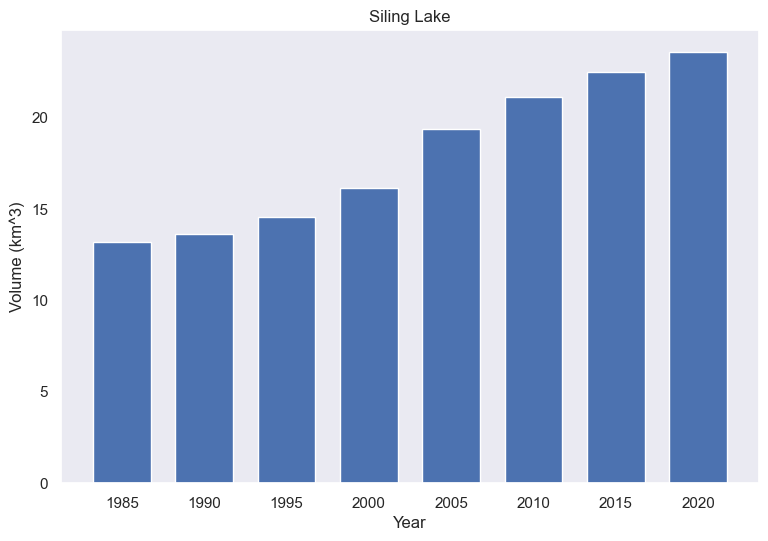

In [91]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.dpi=100

ax.set_title("Siling Lake")
ax.set_xlabel("Year")
ax.set_ylabel("Volume (km^3)")
ax.bar(years, volumes, width=3.5)

In [92]:
#fibonacci function
def fib(n):
    

IndentationError: expected an indented block after function definition on line 2 (2870642753.py, line 3)